<a href="https://colab.research.google.com/github/niyaudinoor/HackathonNAAN/blob/main/Specific_Conductance_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display, HTML

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split

# Scikit-learn: Regression models
from sklearn.ensemble import RandomForestRegressor

# Scikit-learn: Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn import tree

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define the path to the CSV file containing water quality data
csv_path = "/content/drive/MyDrive/6. Colab Notebooks/2. Water Quality/Conductance_Turbidity_Test - Sheet3.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

df.head()

,Date,Average Specific Conductance μS/cm,Average Turbidity FNU,Average Temperature C,Average pH,Average Dissolved Oxygen mg/l,Average Specific Conductance μS/cm +1 day,Average Specific Conductance μS/cm +1 week,Average Specific Conductance μS/cm +4 weeks
0,2024-05-01,1185.3,39.7,19.8,8.3,9.9,1120.0,697.8,1060.0
1,2024-05-02,1007.0,43.1,20.0,8.3,9.8,1007.0,713.6,1094.5
2,2024-05-03,864.5,41.4,20.9,8.3,9.7,864.5,761.3,1199.9
3,2024-05-04,831.7,37.6,19.7,8.1,8.7,831.7,741.2,1372.7
4,2024-05-05,825.8,33.8,18.7,8.1,9.0,825.8,675.2,1432.4


# 4. Preprocessing the Dataset

## 4.1 Separating the Dataset into Inputs and Target

Code Block 4A

In [ ]:
# Drop the 'Date' column and the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the input features DataFrame
inputs = df.drop(['Date', 'Average Specific Conductance μS/cm +1 day','Average Specific Conductance μS/cm +1 week','Average Specific Conductance μS/cm +4 weeks'], axis='columns')

# Select the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the target DataFrame
target = df[['Average Specific Conductance μS/cm +1 day','Average Specific Conductance μS/cm +1 week','Average Specific Conductance μS/cm +4 weeks']]

Code Block 4B

In [ ]:
# Convert the inputs DataFrame to a NumPy array with float data type
inputs = np.array(inputs, dtype=float)

# Convert the target DataFrame to a NumPy array with float data type
target = np.array(target, dtype=float)

## 4.2 Splitting the Training and Testing Data

Code Block 4C

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 5)
X_test shape: (19, 5)
y_train shape: (73, 3)
y_test shape: (19, 3)


# 5. Training the Model


Code Block 5A

In [ ]:
# Initialize a RandomForestRegressor model from the scikit-learn library
model = RandomForestRegressor()

Code Block 5B

In [ ]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestRegressor()

Code Block 5C

In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[1304.2 1042.8  945.3]
 [ 723.   977.   995.2]
 [ 965.4 1002.2  885.8]
 [1033.5 1057.3  870.2]
 [1011.   925.2 1108.9]
 [1088.4 1335.5  943.4]
 [1360.8 1058.9 1000.7]
 [1202.2 1051.5  921.2]
 [ 664.4  515.7 1301.2]
 [1111.3 1046.1  971.7]
 [ 793.7  956.6  826.2]
 [1346.1 1080.   953.8]
 [ 940.   972.5  902.2]
 [ 976.1  872.1  879. ]
 [ 585.   522.6 1202.3]
 [ 776.4  747.4 1258.6]
 [ 434.8  919.5  988.1]
 [1072.4 1274.   963.2]
 [ 800.8  966.3 1007.8]]


In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[1304.2 1042.8  945.3]
 [ 723.   977.   995.2]
 [ 965.4 1002.2  885.8]
 [1033.5 1057.3  870.2]
 [1011.   925.2 1108.9]
 [1088.4 1335.5  943.4]
 [1360.8 1058.9 1000.7]
 [1202.2 1051.5  921.2]
 [ 664.4  515.7 1301.2]
 [1111.3 1046.1  971.7]
 [ 793.7  956.6  826.2]
 [1346.1 1080.   953.8]
 [ 940.   972.5  902.2]
 [ 976.1  872.1  879. ]
 [ 585.   522.6 1202.3]
 [ 776.4  747.4 1258.6]
 [ 434.8  919.5  988.1]
 [1072.4 1274.   963.2]
 [ 800.8  966.3 1007.8]]


Code Block 5D

In [ ]:
# Rounding to 1 decimal place
rounded_y_test = np.round(y_test, 1)

print(rounded_y_test)

[[1304.3  882.2 1196.7]
 [ 666.4 1094.5  730.2]
 [ 986.  1077.7  890.1]
 [1029.   873.6  959. ]
 [1120.   697.8 1060. ]
 [1085.7 1332.9  922. ]
 [1410.4 1004.5 1222.5]
 [1196.7 1145.   899.5]
 [ 675.2  362.  1414.4]
 [1078.7  746.8  858.6]
 [ 877.2  962.2  813.8]
 [1404.  1072.   990.1]
 [ 962.2  836.9  788.8]
 [ 990.1 1031.6  962.2]
 [ 514.3  437.7 1410.4]
 [ 825.8  675.2 1432.4]
 [ 437.7 1014.7 1004.5]
 [1094.5 1386.9  986. ]
 [ 730.2  986.   931. ]]


# 6. Evaluating the Model

Code Block 6A

In [ ]:
# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
mae_1day = np.mean(np.abs(y_test[0] - y_pred[0]))
mae_7days = np.mean(np.abs(y_test[1] - y_pred[1]))
mae_30days = np.mean(np.abs(y_test[2] - y_pred[2]))

print("Overall Mean Absolute Error:", mae)
print("1 day Mean Absolute Error:", mae_1day)
print("1 Week Mean Absolute Error:", mae_7days)
print("4 weeks Mean Absolute Error:", mae_30days)

Overall Mean Absolute Error: 81.40436842105272
1 day Mean Absolute Error: 137.3686666666667
1 Week Mean Absolute Error: 146.35500000000013
4 weeks Mean Absolute Error: 33.468666666666685


Code Block 6B

In [ ]:
# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
# between the true values (y_true) and the predicted values (y_pred)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
mape_1day = mean_absolute_percentage_error(y_test[0], y_pred[0])
mape_7days = mean_absolute_percentage_error(y_test[1], y_pred[1])
mape_30days = mean_absolute_percentage_error(y_test[2], y_pred[2])

print("Overall Mean Absolute Percentage Error:", mape)
print("1 day Mean Absolute Percentage Error:", mape_1day)
print("1 Week Mean Absolute Percentage Error:", mape_7days)
print("4 Weeks Mean Absolute Percentage Error:", mape_30days)

Overall Mean Absolute Percentage Error: 9.307604035142598
1 day Mean Absolute Percentage Error: 13.073288966412026
1 Week Mean Absolute Percentage Error: 18.505812295990864
4 Weeks Mean Absolute Percentage Error: 3.192638962269071


# 7. Visualize the Data

Code Block 7A

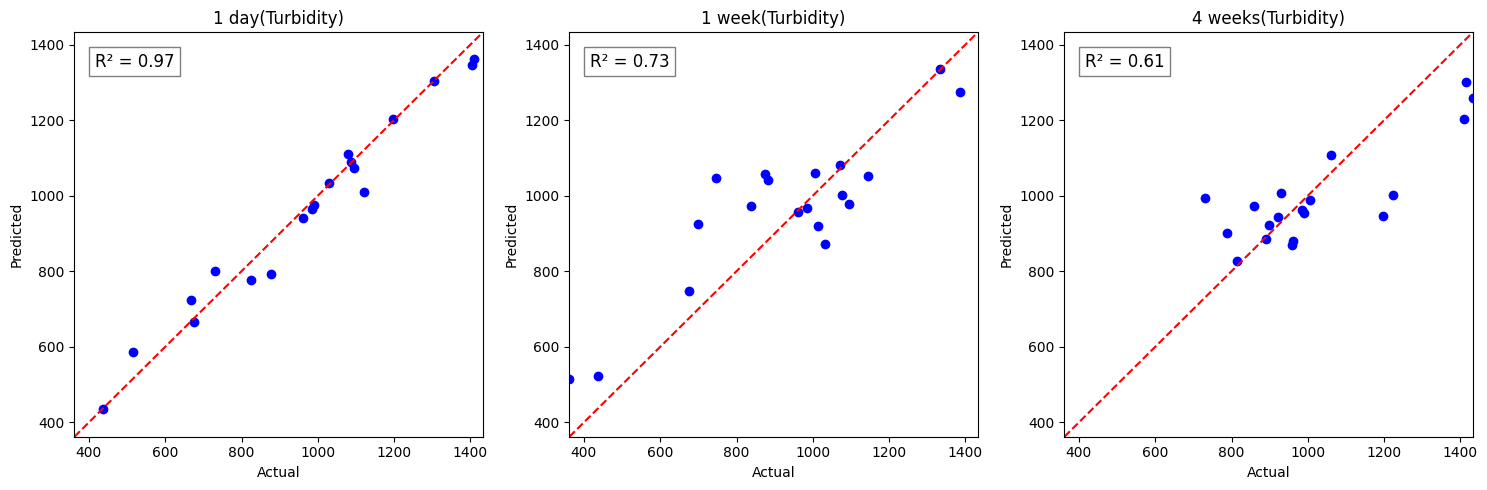

In [ ]:
# Number of features
n_features = y_test.shape[1]

# Create subplots
fig, axes = plt.subplots(1, n_features, figsize=(15, 5))

# Titles for each subplot
titles = ['1 day(Turbidity)', '1 week(Turbidity)', '4 weeks(Turbidity)']

# Determine common axis limits
x_min = min(y_test.min(), y_pred.min())
x_max = max(y_test.max(), y_pred.max())

for i in range(n_features):
    axes[i].scatter(y_test[:, i], y_pred[:, i], c='blue')
    axes[i].plot([x_min, x_max], [x_min, x_max], 'r--')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(x_min, x_max)
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(titles[i])

    # Calculate and annotate R² value
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    axes[i].text(0.05, 0.95, f'R² = {r2:.2f}', transform=axes[i].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

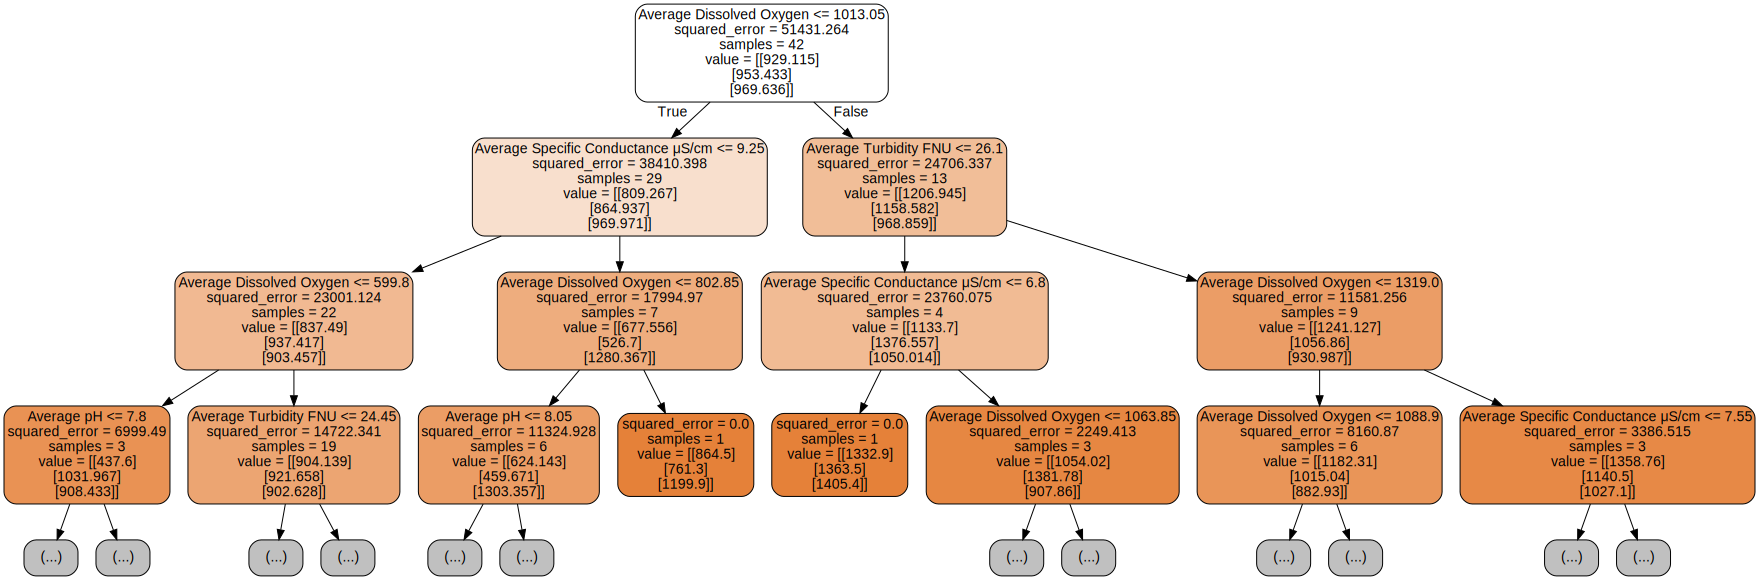

In [ ]:
# TODO: Change this value to view the other decision trees
tree_number = 1

# TODO: Change this value to change the depth of the decision tree
max_depth = 3

tree = model.estimators_[tree_number]

feature_names = ['Average Dissolved Oxygen', 'Average Temperature C',	'Average Turbidity FNU', 'Average pH', 'Average Specific Conductance μS/cm']

dot_data = export_graphviz(tree, feature_names=feature_names, filled=True, rounded=True, max_depth=max_depth)

graph = graphviz.Source(dot_data)
graph.render("water_tree")
graph

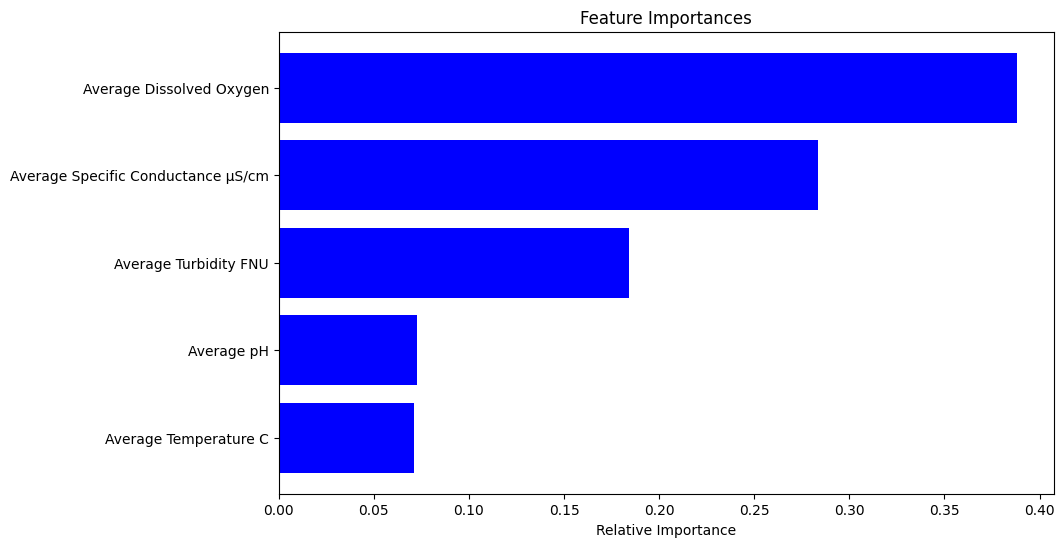

In [ ]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()